In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('../Data Extraction/25subs_500_scored.csv')

In [4]:
df.head()

,comment,score,subreddit
0,I think it would be good for him to do a natio...,491,the_donald
1,"Um I saw on my home page, r/eeeedacted that he...",137,the_donald
2,This man will never walk alone,169,the_donald
3,I am fearful that the hatred spewed nightly is...,139,the_donald
4,Amen. We love him and are all so thankful for ...,100,the_donald


In [5]:
classifiers = []

In [6]:
from sklearn.externals import joblib

In [7]:
for i in range(6):
    classifiers.append(joblib.load("lr_char_" + str(i) + ".joblib"))

In [8]:
train = pd.read_csv('C:/Users/anees/Documents/CS/MP/datasets/toxic comment classification/train.csv')
test = pd.read_csv('C:/Users/anees/Documents/CS/MP/datasets/toxic comment classification/test.csv')

In [9]:
all_text = pd.concat([train.comment_text, test.comment_text])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [11]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)

In [12]:
word_vectorizer.fit(all_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=True,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=True,
        vocabulary=None)

In [13]:
char_vectorizer.fit(all_text)

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=50000, min_df=1,
        ngram_range=(2, 6), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [16]:
import pickle

pickle.dump(word_vectorizer, open("word_vectorizer.pickle", "wb"))
pickle.dump(char_vectorizer, open("char_vectorizer.pickle", "wb"))
# pickle.dump(df_wordfeat, open("word_features.pickle", "wb"))
# pickle.dump(df_charfeat, open("char_features.pickle", "wb"))

In [9]:
import pickle
word_vectorizer = pickle.load(open("word_vectorizer.pickle",'rb'))
char_vectorizer = pickle.load(open("char_vectorizer.pickle",'rb'))

In [10]:
df_wordfeat = word_vectorizer.transform(df.comment)

In [11]:
df_charfeat = char_vectorizer.transform(df.comment)

In [18]:
#wv = pickle.load(open("word_vectorizer.pickle",'rb'))

In [12]:
df_feat = hstack([df_charfeat,df_wordfeat])

In [13]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [14]:
df['toxic'] = '0'
df['severe_toxic'] = '0'
df['obscene'] = '0'
df['threat'] = '0'
df['insult'] = '0'
df['identity_hate'] = '0'

In [15]:
i = 0
for class_name in class_names:
    df[class_name] = classifiers[i].predict_proba(df_feat)[:,1]
    i+=1

In [16]:
pd.unique(df['subreddit'])

array(['the_donald', 'news', 'politics', 'conservative', 'gaming',
       'Showerthoughts', 'science', 'movies', 'wholesomememes',
       'todayilearned', 'theredpill', 'imgoingtohellforthis',
       'cringeanarchy', 'shitpoliticssays', 'atheism', 'wholesomegifs',
       'aww', 'mademesmile', 'kotakuinaction', 'games', 'music', 'sports',
       'funny', '4chan', 'happy'], dtype=object)

In [17]:
pd.value_counts(df['subreddit'])

wholesomegifs           500
atheism                 500
aww                     500
theredpill              500
conservative            500
gaming                  500
news                    500
funny                   500
Showerthoughts          500
games                   500
todayilearned           500
wholesomememes          500
sports                  500
music                   500
kotakuinaction          500
the_donald              500
movies                  500
science                 500
cringeanarchy           500
shitpoliticssays        500
imgoingtohellforthis    500
politics                500
happy                   500
mademesmile             500
4chan                   500
Name: subreddit, dtype: int64

In [18]:
subs = pd.unique(df['subreddit'])
toxic_scores = []
for sub in subs:
    score = []
    for c in class_names:
        x = df[df['subreddit']==sub]
        score.append(x[c].sum()/x.shape[0])
    toxic_scores.append(score)

In [19]:
for i in range(len(subs)):
    print(subs[i])
    print(toxic_scores[i])

the_donald
[0.12209816608485431, 0.008569865834531551, 0.0579383549064099, 0.00339458082991559, 0.04737866915589654, 0.00992222200172498]
news
[0.11999606049375978, 0.007247391263468485, 0.05762252266360938, 0.0032255102667223166, 0.04565424308844233, 0.011365143531387427]
politics
[0.13431971207618174, 0.008796750394580641, 0.06411503889785479, 0.0030310616677880573, 0.05059495590560046, 0.009809345434141267]
conservative
[0.1047031845645367, 0.006624647948822407, 0.048956977153678895, 0.003058389556984159, 0.039777077065537535, 0.0092871349276433]
gaming
[0.13754913378249273, 0.00974666336461432, 0.06769132031402364, 0.0045109404340149505, 0.054185988813658055, 0.009930809408330667]
Showerthoughts
[0.1283556512339231, 0.007898821219860342, 0.05400271275829129, 0.0043643063142424195, 0.04685409451232809, 0.009697323199814735]
science
[0.06370459668739446, 0.004633895207809309, 0.025349995536421047, 0.0025983188738776734, 0.025563139910180836, 0.007077403803149349]
movies
[0.1381115377

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def plot_bar_x(i):
    f, ax = plt.subplots(figsize=(30,5)) 
    index = np.arange(len(subs))
    plt.bar(index, [x[i] for x in toxic_scores])
    plt.xlabel('Subreddit', fontsize=10)
    plt.ylabel('Probability', fontsize=10)
    plt.xticks(index, subs, fontsize=5, rotation=30)
    plt.title(class_names[i])
    plt.show()

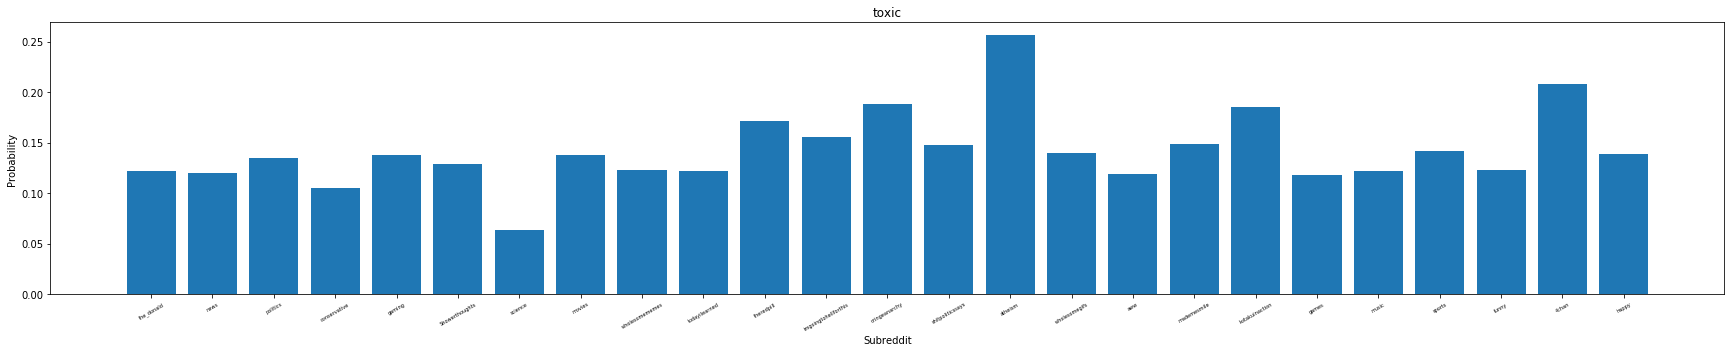

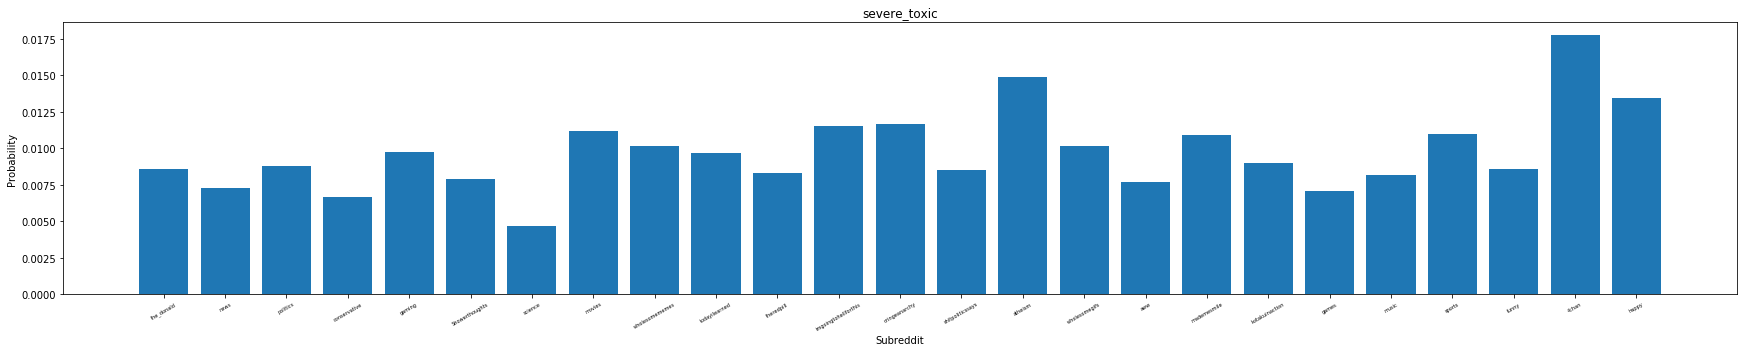

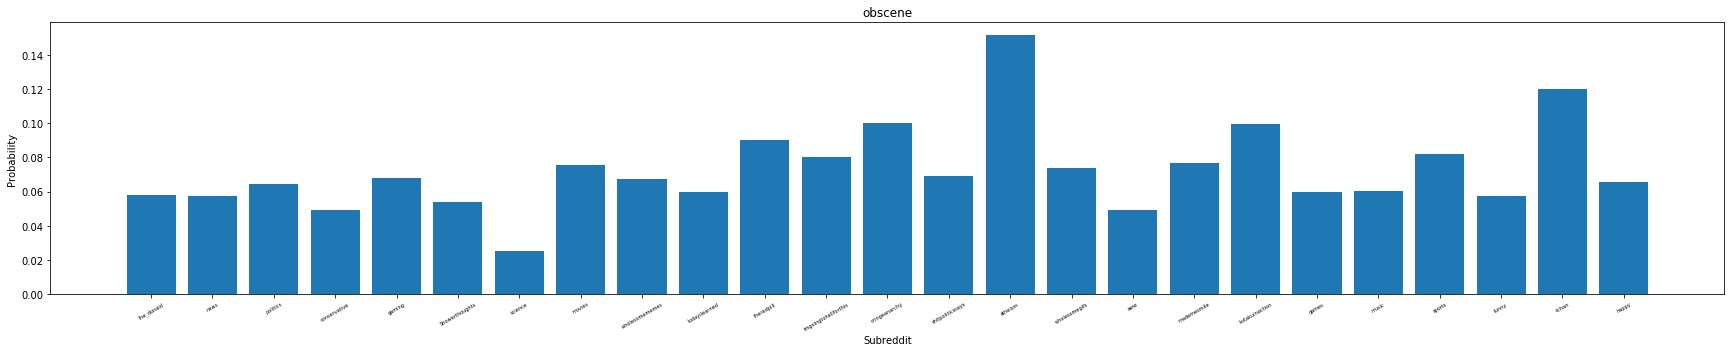

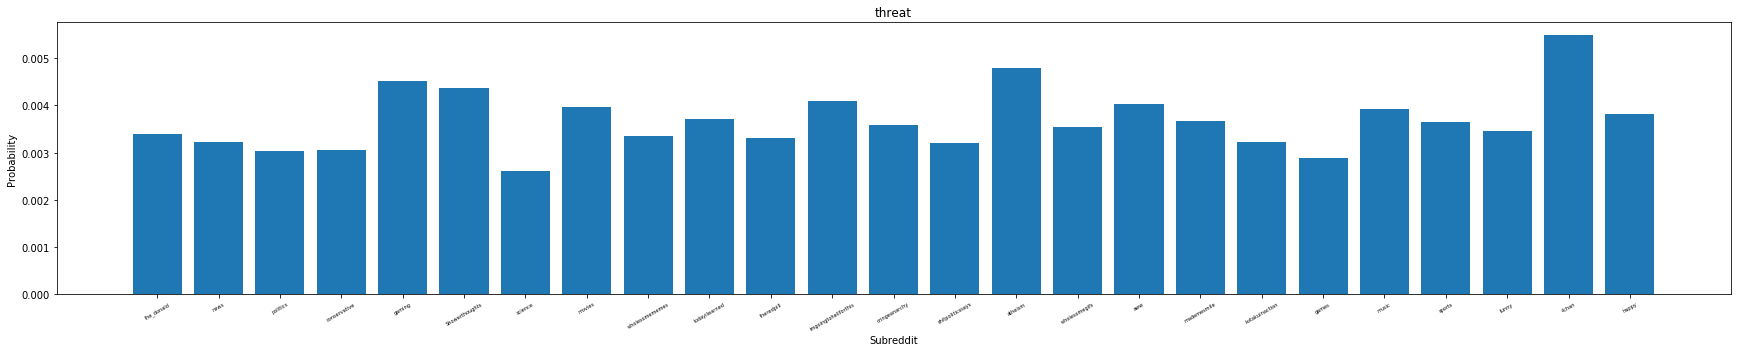

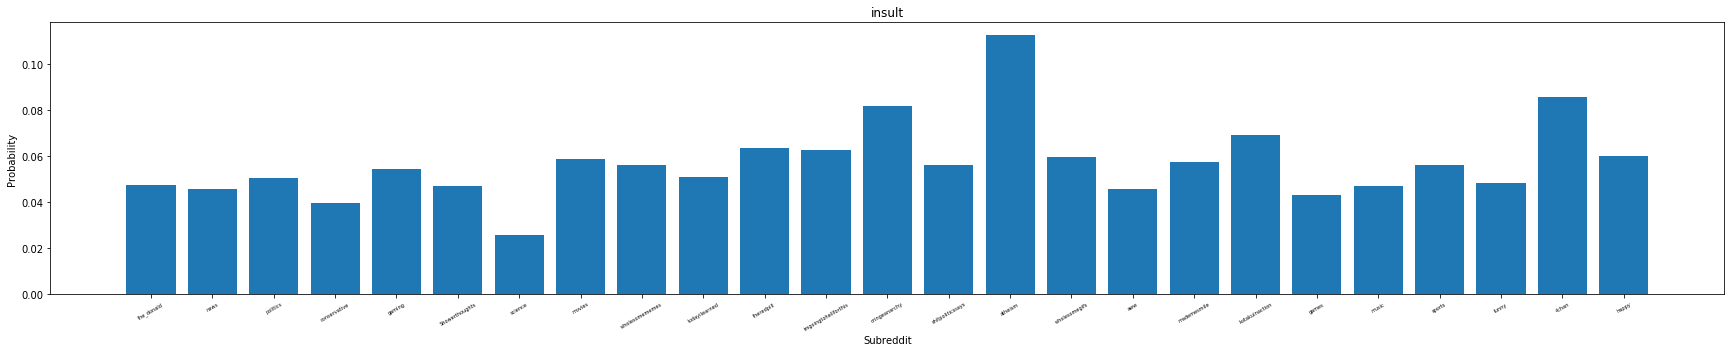

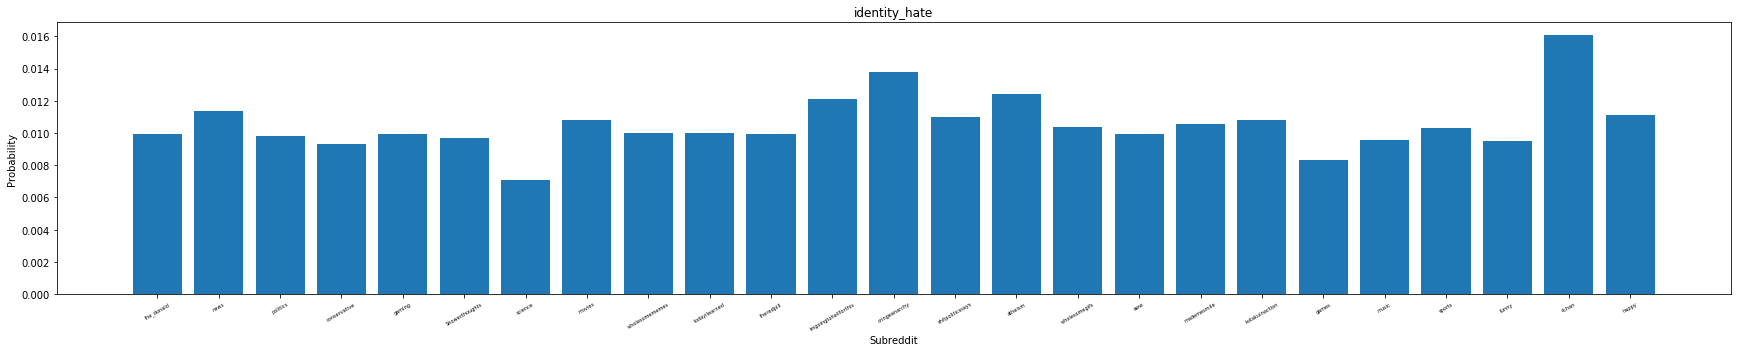

In [22]:
for i in range(6):
    plot_bar_x(i)

In [38]:
avg = []
for sub in subs:
    coms = df[df.subreddit == sub]
    tox = 0 #sum of toxic scores
    tx = 0  #count of toxic comments
    tn = 0
    non_tox = 0
    for row in coms.itertuples():
        max_val = max(row.toxic,row.severe_toxic,row.obscene,row.threat,row.identity_hate)
        if max_val>=0.5:
            tx+=1
            tox+=row.score
        else:
            tn+=1
            non_tox+=row.score
    if tx == 0:
        avg.append([sub, 0,non_tox/tn])
    elif tn == 0:
        avg.append([sub, tox/tx, 0])
    else:
        avg.append([sub, tox/tx, non_tox/tn])

In [39]:
avg

[['the_donald', 34.1875, 40.997933884297524],
 ['news', 45.77777777777778, 158.08091286307055],
 ['politics', 184.12, 179.43157894736842],
 ['conservative', 9.533333333333333, 21.28041237113402],
 ['gaming', 156.72727272727272, 283.14435146443515],
 ['Showerthoughts', 111.9375, 262.9607438016529],
 ['science', 0, 73.75],
 ['movies', 241.73076923076923, 241.21308016877637],
 ['wholesomememes', 81.05263157894737, 112.65072765072765],
 ['todayilearned', 120.21052631578948, 223.77338877338877],
 ['theredpill', 30.057142857142857, 13.380645161290323],
 ['imgoingtohellforthis', 20.428571428571427, 40.84301075268817],
 ['cringeanarchy', 13.944444444444445, 18.881165919282513],
 ['shitpoliticssays', 15.129032258064516, 18.4818763326226],
 ['atheism', 138.22471910112358, 140.65450121654501],
 ['wholesomegifs', 16.03846153846154, 38.69831223628692],
 ['aww', 23.857142857142858, 135.1764705882353],
 ['mademesmile', 90.3125, 182.11111111111111],
 ['kotakuinaction', 42.735849056603776, 27.449664429

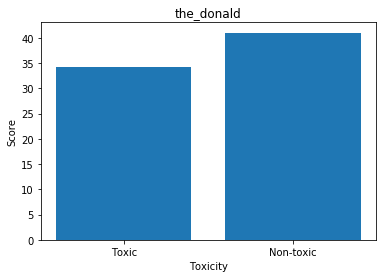

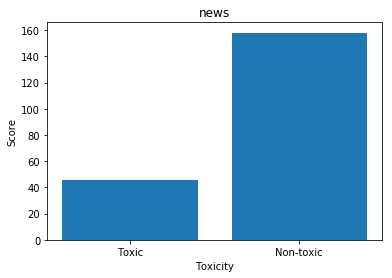

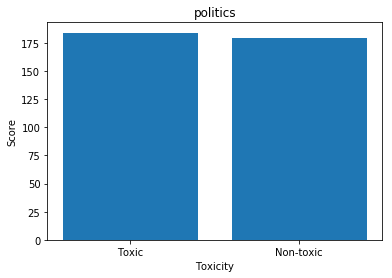

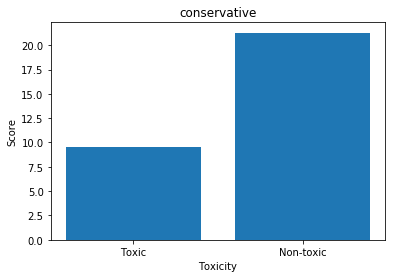

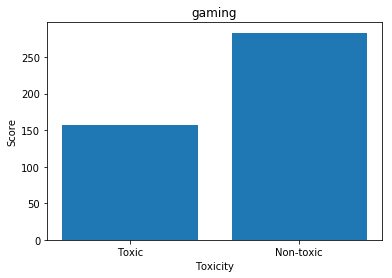

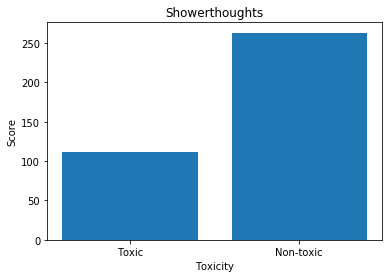

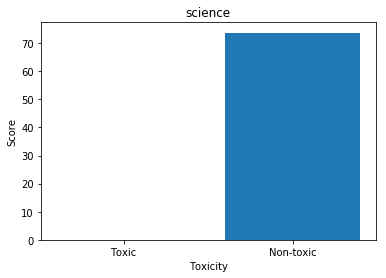

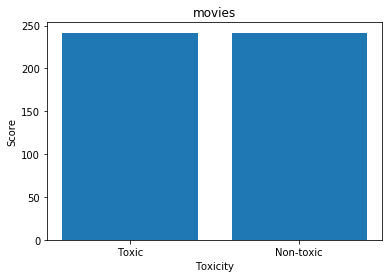

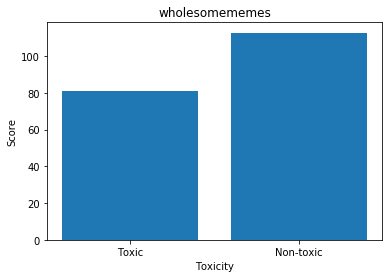

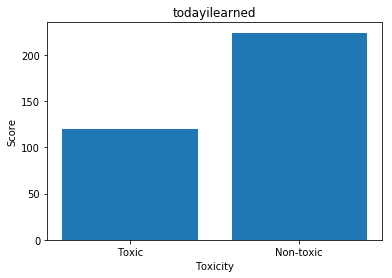

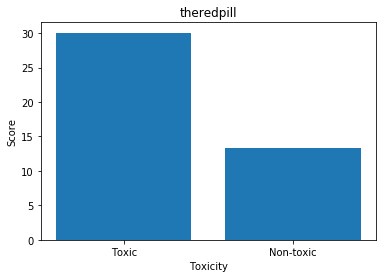

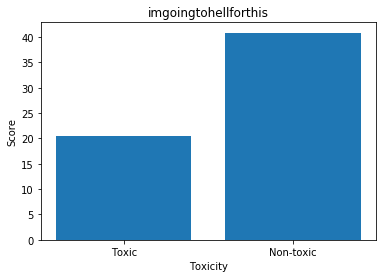

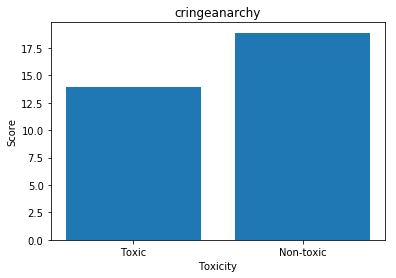

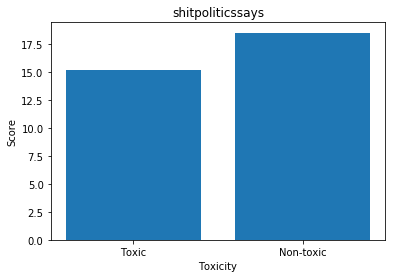

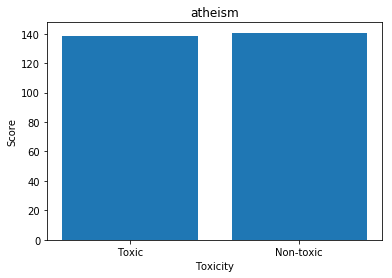

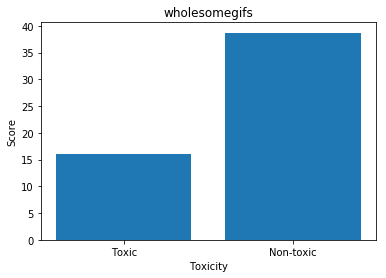

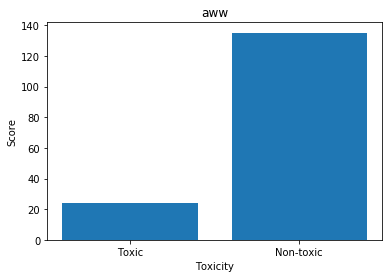

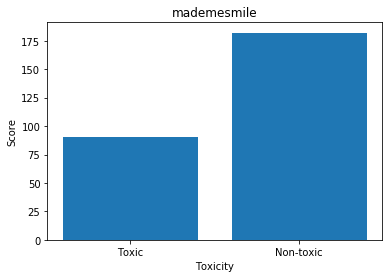

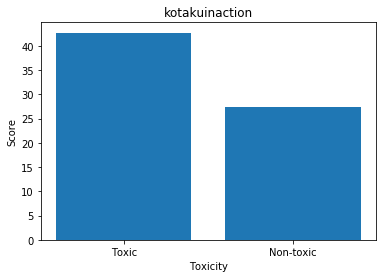

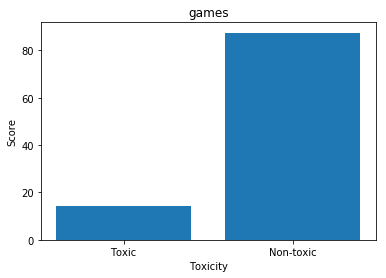

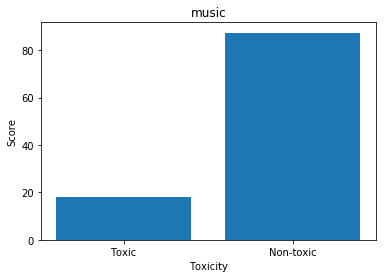

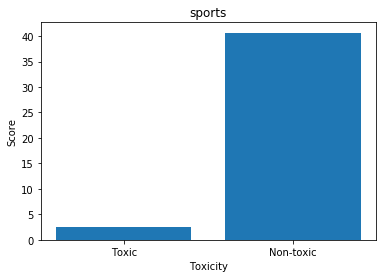

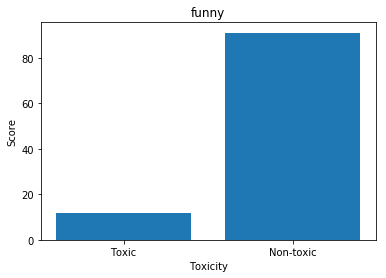

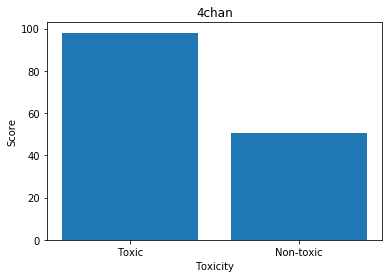

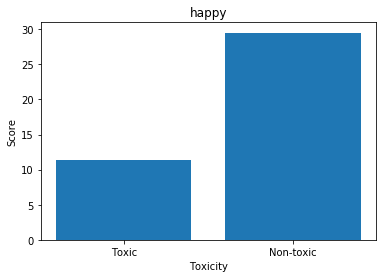

In [61]:
#fig = plt.figure()
for i in range(0,25):
    #plt.subplot(5,5,i+1)
    index = np.arange(2)
    plt.bar(index, [avg[i][1],avg[i][2]])
    plt.xlabel('Toxicity', fontsize=10)
    plt.ylabel('Score', fontsize=10)
    plt.xticks(index, ['Toxic','Non-toxic'], fontsize=10)
    plt.title(avg[i][0])
    plt.show()